Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'C': 10, 'epsilon': 0.5, 'gamma': 0.1}
Mean Squared Error: 449093056.1278
R-squared Score: -0.0267
Accuracy: 86.48%


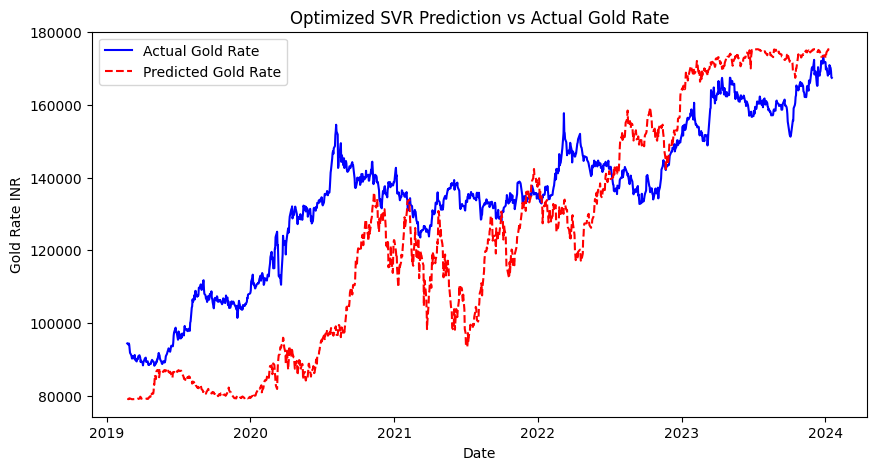

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('SENSEX_GOLD.xlsx')

# Convert Date column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Selecting features and target variable
X = df[['SENSEX INR']]
y = df['Gold Rate INR']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Define a reduced parameter grid for SVR (optimized for speed)
param_grid = {
    'C': [10, 100],  
    'epsilon': [0.1, 0.5],  
    'gamma': ['scale', 0.1]  
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train_scaled)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train SVR with best parameters
svr = SVR(kernel='rbf', **best_params)
svr.fit(X_train_scaled, y_train_scaled)

# Predict on test set
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 * (1 - mape)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Plot actual vs predicted values
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual Gold Rate', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Gold Rate', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Gold Rate INR')
plt.title('Optimized SVR Prediction vs Actual Gold Rate')
plt.legend()
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'C': 10, 'epsilon': 0.5, 'gamma': 0.1}
Mean Squared Error: 449093056.1278
R-squared Score: -0.0267
Accuracy: 86.48%


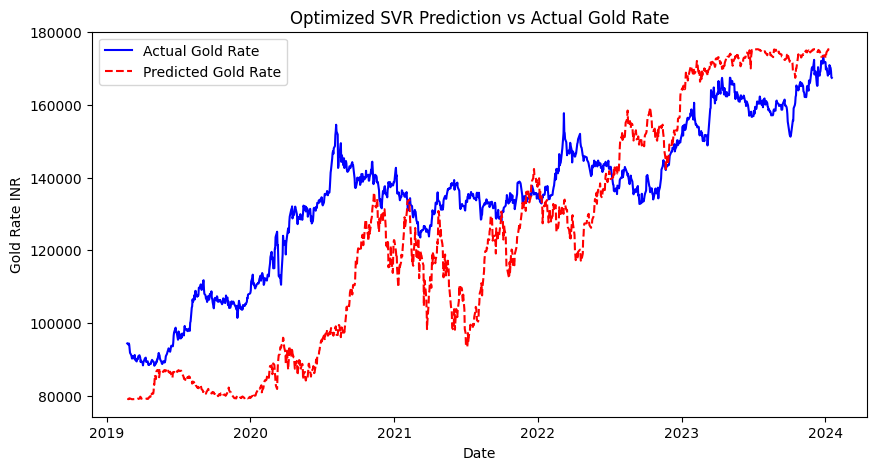

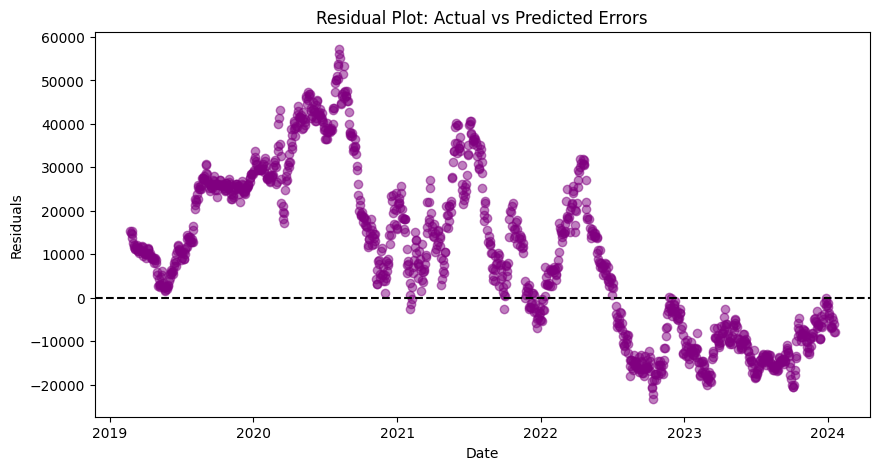

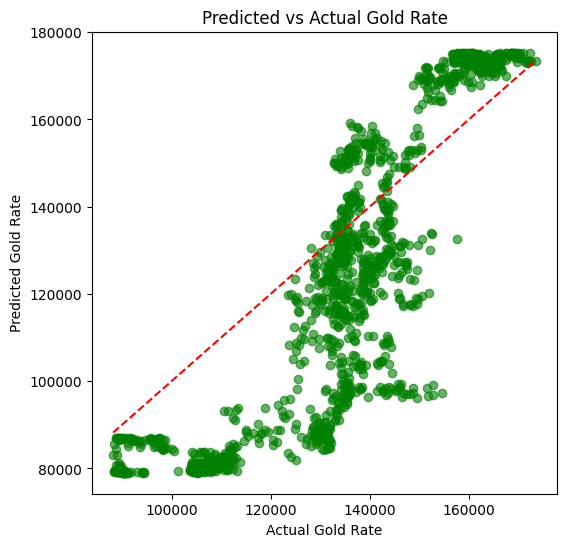

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# Load dataset
df = pd.read_excel('SENSEX_GOLD.xlsx')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.dropna(inplace=True)

# Selecting features and target variable
X = df[['SENSEX INR']]
y = df['Gold Rate INR']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Grid Search for best SVR params
param_grid = {'C': [10, 100], 'epsilon': [0.1, 0.5], 'gamma': ['scale', 0.1]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train_scaled)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train SVR with best params
svr = SVR(kernel='rbf', **best_params)
svr.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 * (1 - mape)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Visualization 1: Actual vs Predicted Gold Rate
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual Gold Rate', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Gold Rate', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Gold Rate INR')
plt.title('Optimized SVR Prediction vs Actual Gold Rate')
plt.legend()
plt.show()

# Visualization 2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
plt.scatter(y_test.index, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Plot: Actual vs Predicted Errors')
plt.show()

# Visualization 3: Scatter Plot (Predicted vs Actual)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.xlabel('Actual Gold Rate')
plt.ylabel('Predicted Gold Rate')
plt.title('Predicted vs Actual Gold Rate')
plt.show()


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mean Squared Error: 449093056.1278
R-squared Score: -0.0267
Accuracy: 86.48%


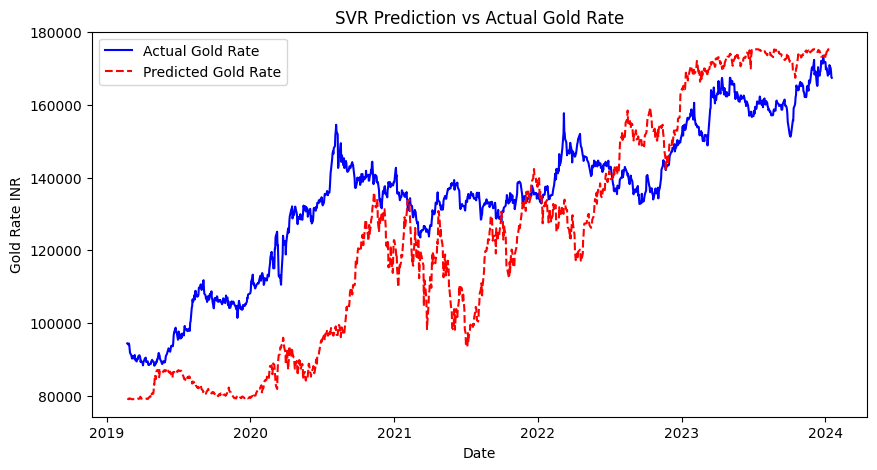

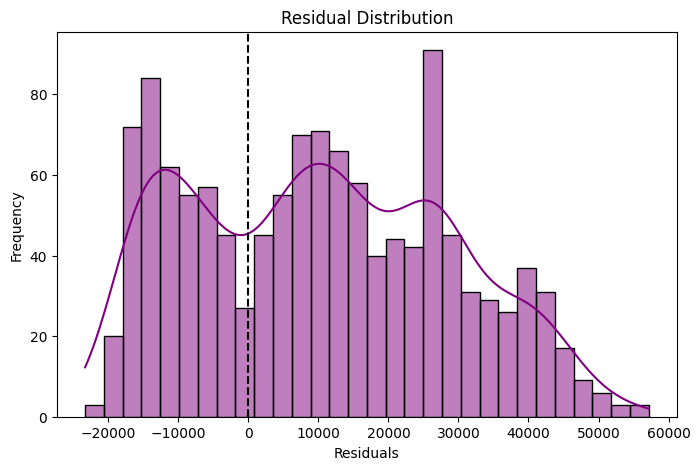

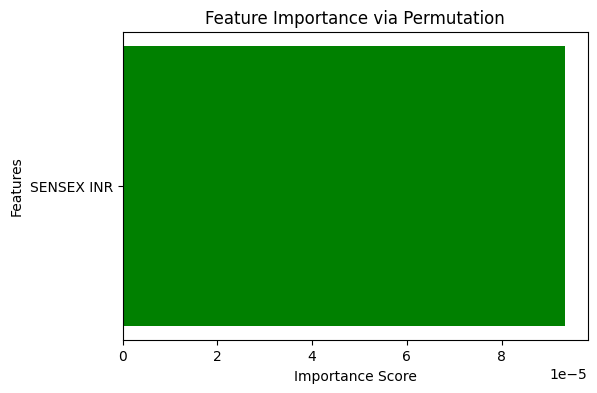

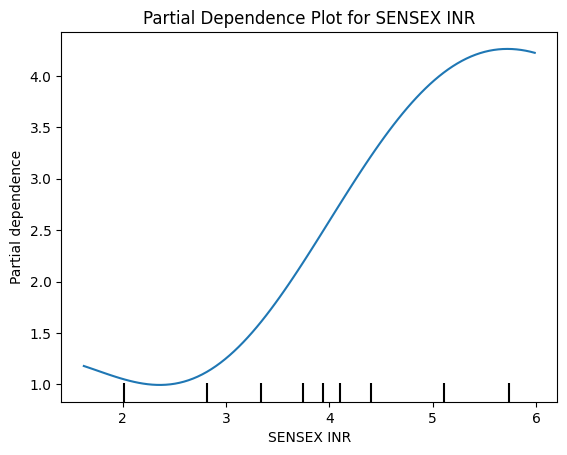

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# Load dataset
df = pd.read_excel('SENSEX_GOLD.xlsx')

# Convert Date column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Handle missing values
df.dropna(inplace=True)

# Selecting features and target variable
X = df[['SENSEX INR']]
y = df['Gold Rate INR']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Scale the features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Define parameter grid for SVR
param_grid = {'C': [10, 100], 'epsilon': [0.1, 0.5], 'gamma': ['scale', 0.1]}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train_scaled)

# Train SVR with best parameters
best_params = grid_search.best_params_
svr = SVR(kernel='rbf', **best_params)
svr.fit(X_train_scaled, y_train_scaled)

# Predict on test set
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 * (1 - mape)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

# Visualization 1: Actual vs Predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label='Actual Gold Rate', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Gold Rate', color='red', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Gold Rate INR')
plt.title('SVR Prediction vs Actual Gold Rate')
plt.legend()
plt.show()

# Visualization 2: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.axvline(0, color='black', linestyle='dashed')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()

# Visualization 3: Feature Importance (Permutation Importance)
perm_importance = permutation_importance(svr, X_test_scaled, y_test, n_repeats=30, random_state=42)
feature_importance = perm_importance.importances_mean

plt.figure(figsize=(6,4))
plt.barh(X.columns, feature_importance, color='green')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance via Permutation')
plt.show()

# Visualization 4: Partial Dependence Plot
PartialDependenceDisplay.from_estimator(svr, X_test_scaled, features=[0], feature_names=['SENSEX INR'])
plt.title('Partial Dependence Plot for SENSEX INR')
plt.show()

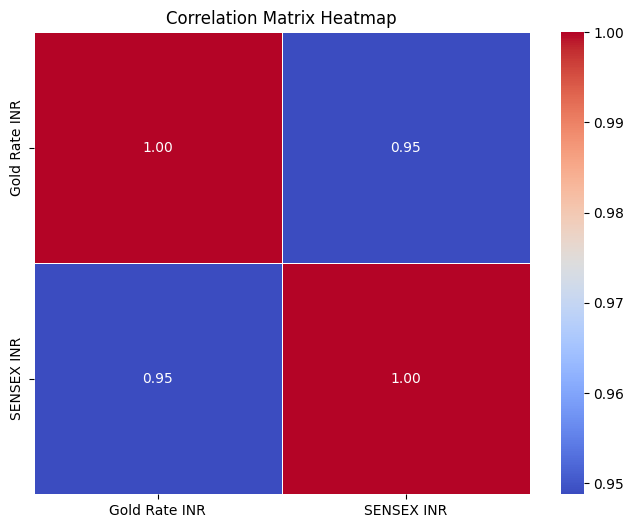

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
